<a href="https://colab.research.google.com/github/geetha2612/Exploratory_Data_Analysis/blob/main/Eda_Ex_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/COUNTRY DATASET.csv')
df.head()

,name,country_id,country_code,country_name,state_code,type,latitude,longitude
0,Alberta,39,CA,Canada,AB,province,53.933271,-116.576504
1,British Columbia,39,CA,Canada,BC,province,53.726668,-127.647621
2,Manitoba,39,CA,Canada,MB,province,53.760861,-98.813876
3,New Brunswick,39,CA,Canada,NB,province,46.565316,-66.461916
4,Newfoundland and Labrador,39,CA,Canada,NL,province,53.135509,-57.660436


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          13 non-null     object 
 1   country_id    13 non-null     int64  
 2   country_code  13 non-null     object 
 3   country_name  13 non-null     object 
 4   state_code    13 non-null     object 
 5   type          13 non-null     object 
 6   latitude      13 non-null     float64
 7   longitude     13 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 960.0+ bytes


In [ ]:
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
df_geo.head()

,name,country_id,country_code,country_name,state_code,type,latitude,longitude,geometry
0,Alberta,39,CA,Canada,AB,province,53.933271,-116.576504,POINT (-116.57650 53.93327)
1,British Columbia,39,CA,Canada,BC,province,53.726668,-127.647621,POINT (-127.64762 53.72667)
2,Manitoba,39,CA,Canada,MB,province,53.760861,-98.813876,POINT (-98.81388 53.76086)
3,New Brunswick,39,CA,Canada,NB,province,46.565316,-66.461916,POINT (-66.46192 46.56532)
4,Newfoundland and Labrador,39,CA,Canada,NL,province,53.135509,-57.660436,POINT (-57.66044 53.13551)


In [ ]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

india = world.loc[world['name'] == 'Canada'] # get Singapore row
boundaries = india['geometry'] # get Singapore geometry
print(boundaries)
print(india)
world.head()

3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
Name: geometry, dtype: geometry
    pop_est      continent    name iso_a3  gdp_md_est  \
3  35623680  North America  Canada    CAN   1674000.0   

                                            geometry  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(0.5, 1.0, 'CANADA')

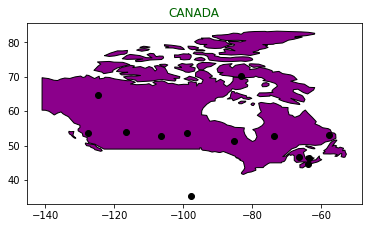

In [ ]:
axis=world.loc[world['name'] == 'Canada'].plot(
color='#8B008B',edgecolor='black')

df_geo.plot(ax=axis , color='black')
plt.title('CANADA',color='#006400')

AxesSubplot(0.267062,0.125;0.490876x0.755)


Text(0.5, 1.0, 'BRAZIL')

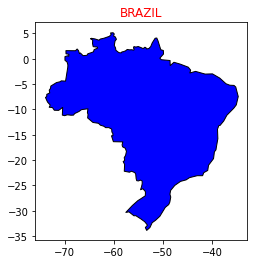

In [ ]:
axis=world.loc[world['name'] == 'Brazil'].plot(
color='#0000ff',edgecolor='black')
print(axis)
plt.title('BRAZIL',color='#ff0000')

AxesSubplot(0.157481,0.125;0.710038x0.755)


Text(0.5, 1.0, 'CHINA')

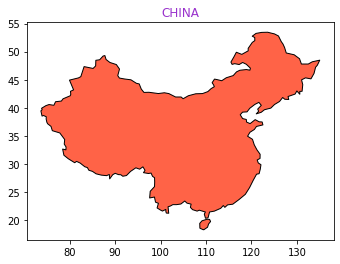

In [ ]:
axis=world.loc[world['name'] == 'China'].plot(
color='Tomato',edgecolor='black')
print(axis)
plt.title('CHINA',color='#9932CC')

AxesSubplot(0.239222,0.125;0.546555x0.755)


Text(0.5, 1.0, 'AUSTRALIA')

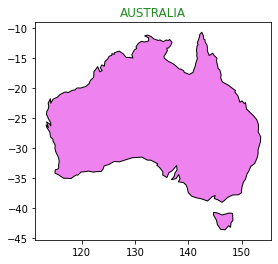

In [ ]:
axis=world.loc[world['name'] == 'Australia'].plot(
color='Violet',edgecolor='black')
print(axis)
plt.title('AUSTRALIA',color='#228B22')